# One point mass Impact Force

Our appraoch to model the door of the bus is to represent it with a mass-spring-damper system subjected to an external force. Firstly,we will simplify it to one point mass system, then we will make more complicated by extending it to two-point mass system and three; where they are connected to the upper and lower holder connected to bus. And also show the internal behavior of the bus itself as we divide it to three masses. 


Some system properties are: time step, duration, and external force are defined, and the equation of motion is solved using direct integration. The displacement versus time plot is generated using the Plots library.



The below case represents an impact force.

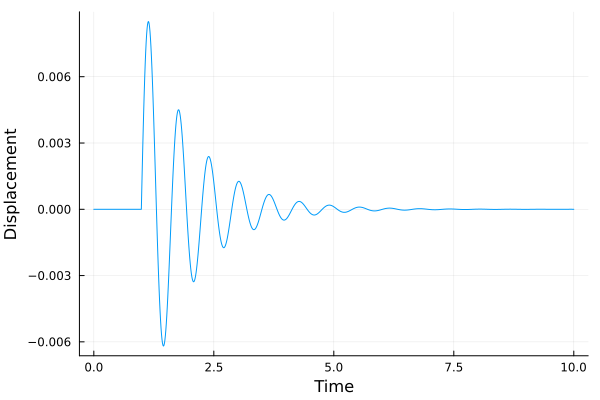

In [5]:
using DifferentialEquations

# Define system properties
m = 1.0   # mass
k = 100.0 # spring constant
c =2   # damping coefficient

# Define time step and duration
dt = 0.01     # time step
t_end = 10.0   # simulation duration
t = collect(0:dt:t_end)   # time array

# Define external force
F = zeros(length(t))   # initialize force array
F[100] = 9.8           # apply impulse at t=0

# Initialize displacement and velocity arrays
x = zeros(length(t))
v = zeros(length(t))

# Solve equation of motion using direct integration
for i = 2:length(t)
    # Calculate acceleration
    a = (F[i-1] - c*v[i-1] - k*x[i-1])/m
    
    # Update velocity and displacement
    v[i] = v[i-1] + a*dt
    x[i] = x[i-1] + v[i]*dt
end

# Plot displacement vs time
using Plots
plot(t, x, xlabel="Time", ylabel="Displacement", legend=false)


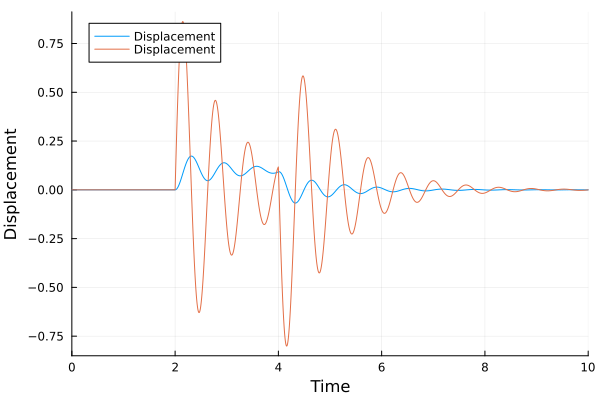

In [6]:
using DifferentialEquations, Plots

# Define system properties
m = 1.0   # mass
k = 100.0 # spring constant
c = 2.0   # damping coefficient

# Define time step and duration
t_end = 10.0  # simulation duration
tspan = (0.0, t_end)

#Define external force
function F(t)
    if t >= 2.0 && t <= 4.0
        return 10.0
    else
        return 0.0
    end
end

# Define ODE system
function vibrating_spring!(du, u, p, t)
    x, v = u
    F_t = F(t)
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    #F = ifelse(t >= 2.0, 4.0, 0.0)
    du[2] = (F_t - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]

# Parameters
p = [k, c, m]

# Solve ODE system
prob = ODEProblem(vibrating_spring!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
plot(sol, xlabel="Time", ylabel="Displacement", label="Displacement", legend=:topleft)


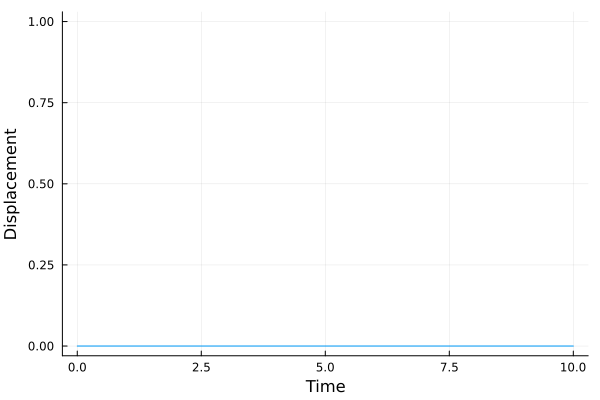

In [6]:
using DifferentialEquations

# Define system properties
m = 1.0   # mass
k = 100.0 # spring constant
c = 2.0   # damping coefficient

# Define natural frequency and time step
wn = sqrt(k/m)    # natural frequency
dt = 0.01         # time step

# Define time span and external force
tspan = (0.0, 10.0)
t = collect(tspan[1]:dt:tspan[2])
F = 10.0*sin.(2*wn*t)   # impact force at 2 times natural frequency

# Define initial conditions
x0 = 0.0
v0 = 0.0

# Define ODE function
function vibrating_mass!(du, u, p, t)
    x, v = u
    k, c, m = p
    du[1] = v
    du[2] = (F[findfirst(isequal(t),t)] - k*x - c*v) / m
end

# Define ODE problem
prob = ODEProblem(vibrating_mass!, [x0, v0], tspan, [k, c, m])

# Solve ODE problem
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
using Plots
plot(sol.t, sol[1,:], xlabel="Time", ylabel="Displacement", legend=false)


## One Point Mass Vibrational Force
- What about vibration force at driving frequency different from natural frequency?
- What about vibration force at driving frequency equal to natural frequency? 
- Repeat analysis for impact force using DifferentialEquations? 


The following code solves an ordinary differential equation system that describes the motion of a vibrating door subjected to a sinusoidal force. The function vibrating_door! defines the system of equations, with the position, velocity, and force as inputs, and the parameters k, c, and m defining the properties of the door. The initial conditions, parameters, and time span are defined, and the ODE system is solved using the solve function from the DifferentialEquations library. Finally, the results are plotted using the Plots library, showing the position and velocity of the door over time.



This case represents an vibrational force.


┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


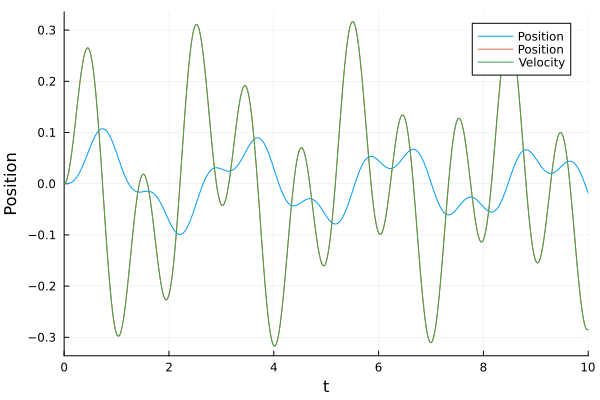

In [2]:
using DifferentialEquations, Plots

function vibrating_door!(du,u,p,t)
    x, v = u
    F = 10sin(2π*t) # Sinusoidal force
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    du[2] = (F - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
c = 1   # damping coefficient
m = 10  # mass
p = [k, c, m]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
prob = ODEProblem(vibrating_door!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
plot(sol, xlabel="Time", label="Position", ylabel="Position")
plot!(sol, vars=(2), label="Velocity")
# Plot results
# plot(sol, xlabel="Time", label="Position", ylabel="Position", linecolor=:blue)
# plot!(sol, vars=(1), label="Velocity", linecolor=:red)


# One Point Mass Vibrational Force at driving frequency equal to Natural frequency 

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


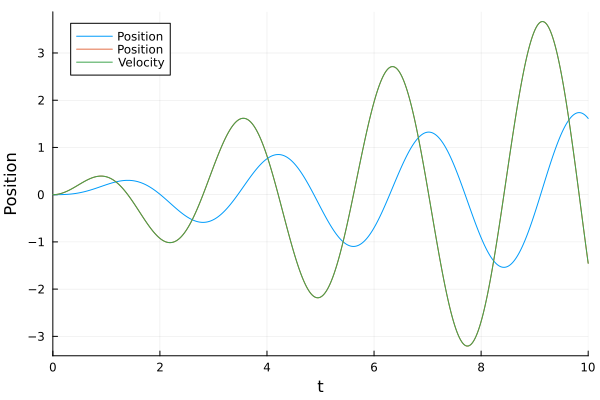

In [1]:
using DifferentialEquations, Plots

function vibrating_door!(du,u,p,t)
    x, v = u
    ω = sqrt(p[1] / p[3])  # natural frequency
    F = 10sin(ω*t)  # sinusoidal force at natural frequency
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    du[2] = (F - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
c = 1   # damping coefficient
m = 10  # mass
p = [k, c, m]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
prob = ODEProblem(vibrating_door!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
plot(sol, xlabel="Time", label="Position", ylabel="Position")
plot!(sol, vars=(2), label="Velocity")


# Driving frequency different from natural frequency 

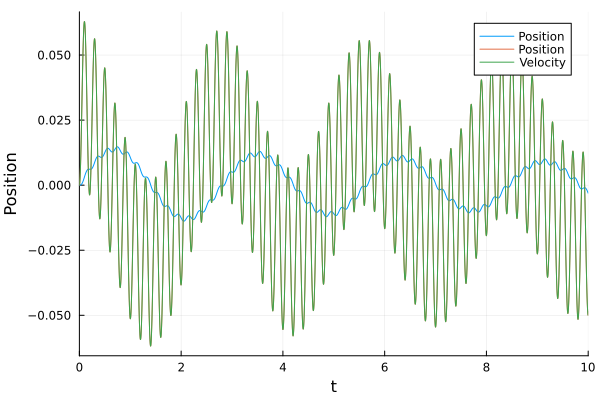

In [2]:
using DifferentialEquations, Plots

function vibrating_door!(du,u,p,t)
    x, v = u
    F = 10sin(2π*5*t) # Sinusoidal force at 5 Hz
    k = p[1]
    c = p[2]
    m = p[3]
    du[1] = v
    du[2] = (F - k*x - c*v) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
c = 1   # damping coefficient
m = 10  # mass
p = [k, c, m]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
prob = ODEProblem(vibrating_door!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Plot results
plot(sol, xlabel="Time", label="Position", ylabel="Position")
plot!(sol, vars=(2), label="Velocity")


## Two Point Mass with Impact Force

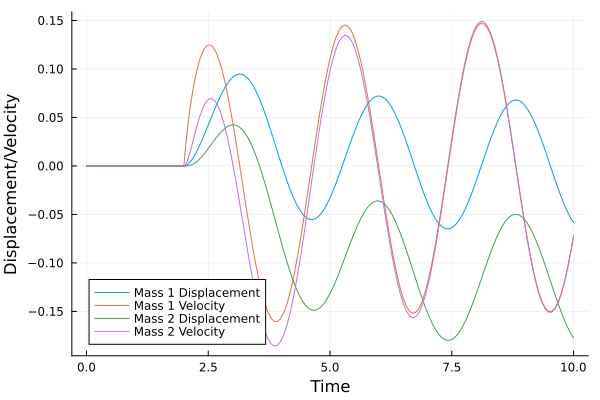

In [10]:
using DifferentialEquations, Plots

function impacting_door!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    v1 = u[3]
    v2 = u[4]
    k = p[1]
    c = p[2]
    m1 = p[3]
    m2 = p[4]
    ω₀ = p[5]
    F = ifelse(t >= 2.0, 6.0, 0.0) # Impulse force at t = 2.0 seconds
    du[1] = v1
    du[2] = v2
    du[3] = (F - k*(x1 - x2) - c*(v1 - v2) - m1*ω₀^2*x1) / m1
    du[4] = (-k*(x1 - x2) - c*(v2 - v1) - m2*ω₀^2*x2) / m2
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
m1 = 10  # mass 1
m2 = 10  # mass 2
ω₀ = sqrt(k/m1)  # natural frequency
c = 2*m1*ω₀  # critical damping coefficient
p = [k, c, m1, m2, ω₀]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
sol = solve(ODEProblem(impacting_door!, u0, tspan, p), Tsit5(), reltol=1e-8, abstol=1e-8)

# Extract displacement and velocity components of the solution
x1 = [sol[i][1] for i in 1:length(sol)]
x2 = [sol[i][2] for i in 1:length(sol)]
v1 = [sol[i][3] for i in 1:length(sol)]
v2 = [sol[i][4] for i in 1:length(sol)]

# Plot results
plot(sol.t, x1, xlabel="Time", ylabel="Displacement/Velocity", label="Mass 1 Displacement")
plot!(sol.t, v1, label="Mass 1 Velocity")
plot!(sol.t, x2, label="Mass 2 Displacement")
plot!(sol.t, v2, label="Mass 2 Velocity")


## Two Point Mass with Vibrational Force
- Plot the velocities as well? 
- Explain why external force is applied to mass $m_1$? 
- Explain how mass $m_2$ due to force applied to $m_1$
- What motivates the terms $m_1 \, \omega_0^2 \, x_1$? 
- Repeat analysis for impact force; 


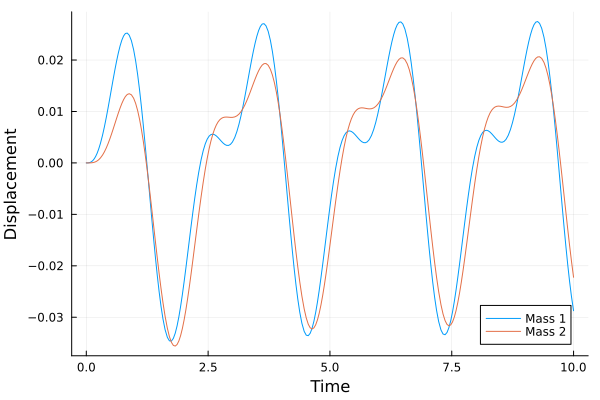

In [8]:
using DifferentialEquations, Plots

function vibrating_door!(du,u,p,t)
    x1 = u[1]
    x2 = u[2]
    v1 = u[3]
    v2 = u[4]
    k = p[1]
    c = p[2]
    m1 = p[3]
    m2 = p[4]
    ω₀ = p[5]
    F = 3*sin(2*ω₀*t) # Sinusoidal force
    du[1] = v1
    du[2] = v2
    du[3] = (F - k*(x1 - x2) - c*(v1 - v2) - m1*ω₀^2*x1) / m1
    du[4] = (-k*(x1 - x2) - c*(v2 - v1) - m2*ω₀^2*x2) / m2
end

# Initial conditions
u0 = [0.0, 0.0, 0.0, 0.0]  # initial position and velocity

# Parameters
k = 50  # spring constant
m1 = 10  # mass 1
m2 = 10  # mass 2
ω₀ = sqrt(k/m1)  # natural frequency
c = 2*m1*ω₀  # critical damping coefficient
p = [k, c, m1, m2, ω₀]

# Time span
tspan = (0.0, 10.0)  # 10 seconds of simulation time

# Solve ODE system
sol = solve(ODEProblem(vibrating_door!, u0, tspan, p), Tsit5(), reltol=1e-8, abstol=1e-8)

# Extract displacement and velocity components of the solution
x1 = [sol[i][1] for i in 1:length(sol)]
x2 = [sol[i][2] for i in 1:length(sol)]
v1 = [sol[i][3] for i in 1:length(sol)]
v2 = [sol[i][4] for i in 1:length(sol)]

# Plot results
plot(sol.t, x1, xlabel="Time", ylabel="Displacement/Velocity", label="Mass 1 Displacement")
plot!(sol.t, v1, label="Mass 1 Velocity")
plot!(sol.t, x2, label="Mass 2 Displacement")
plot!(sol.t, v2, label="Mass 2 Velocity")
